In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore the data
print(df.head())
print(df.info())
print(df['target'].value_counts())  # Check for class imbalance

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 0.99737962659679


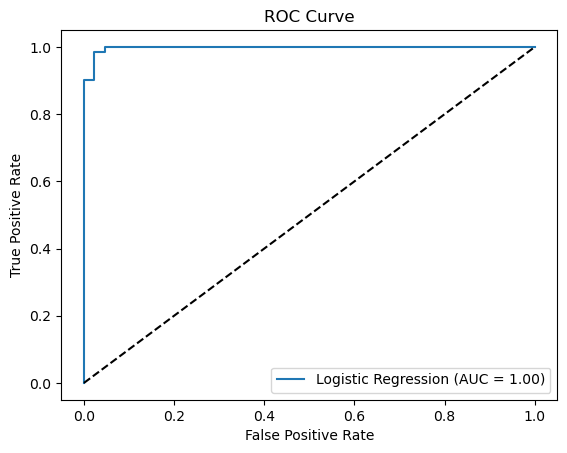

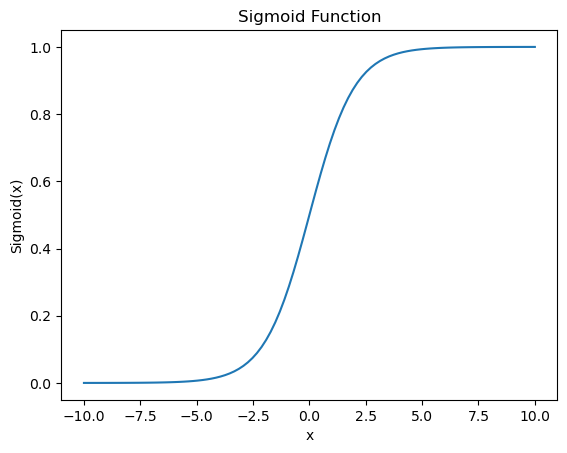

In [4]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (includes precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')  # Save for GitHub
plt.show()

# Plot Sigmoid Function (for understanding)
import numpy as np
x = np.linspace(-10, 10, 100)
y_sigmoid = 1 / (1 + np.exp(-x))
plt.figure()
plt.plot(x, y_sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.savefig('sigmoid_function.png')  # Save for GitHub
plt.show()

In [5]:
# Find optimal threshold (You can experiment with this)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold}")

# Make predictions with new threshold
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate with new threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

Optimal threshold: 0.6206578599836926

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

